## 1. Importing all the required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading Dataset

In [6]:
advertisement = pd.read_csv('advertising.csv')
advertisement.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Exploration

In [8]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
type(advertisement)

pandas.core.frame.DataFrame

In [10]:
advertisement.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

## 3. Checking null values

In [11]:
advertisement.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## 4. Data Visualization

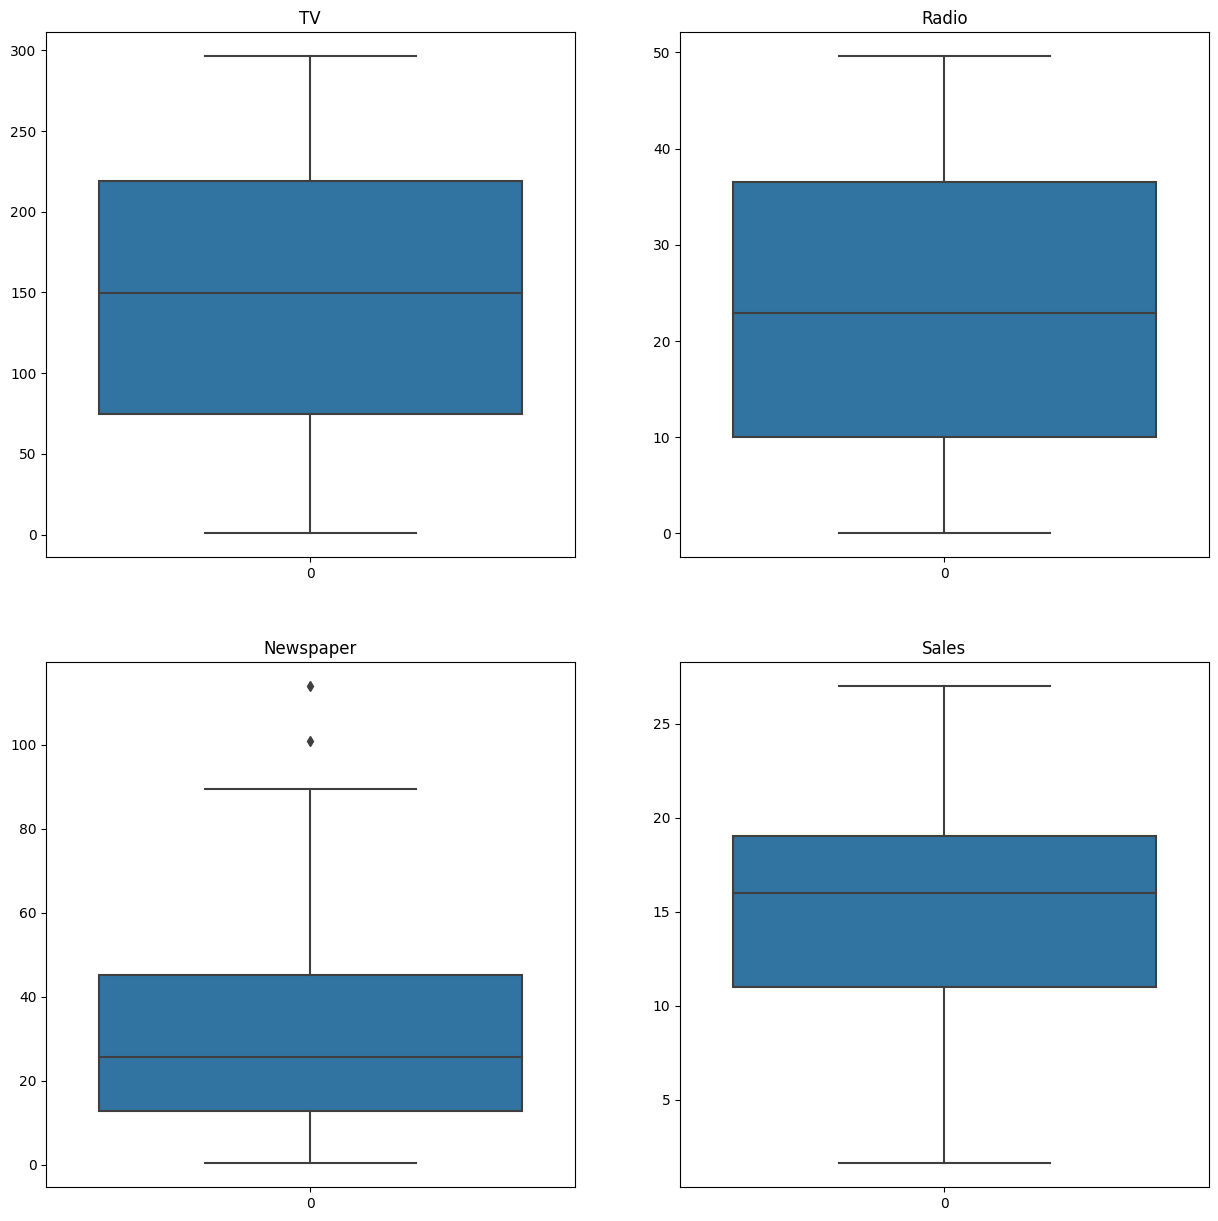

In [24]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(advertisement['TV']).set_title('TV')
plt.subplot(2,2,2)
sns.boxplot(advertisement['Radio']).set_title('Radio')
plt.subplot(2,2,3)
sns.boxplot(advertisement['Newspaper']).set_title('Newspaper')
plt.subplot(2,2,4)
sns.boxplot(advertisement['Sales']).set_title('Sales');

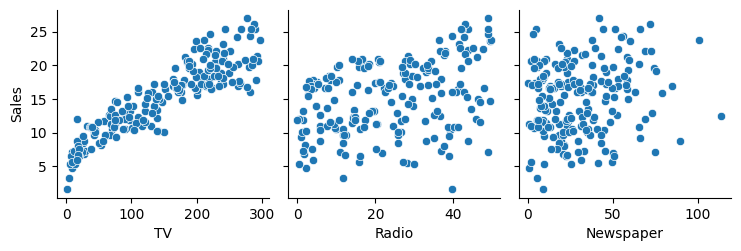

In [31]:
sns.pairplot(advertisement, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales']);

## 5. Data Corelation

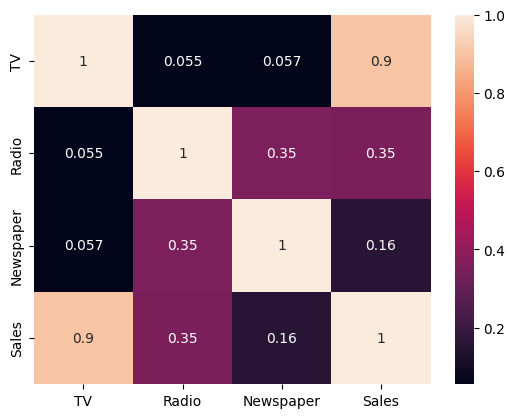

In [41]:
sns.heatmap(advertisement.corr(), annot=True);

## 6. Splitting Data

In [49]:
from sklearn.model_selection import train_test_split
X=advertisement['TV'].values.reshape(-1,1)
y=advertisement['Sales'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7. Model Selection and fitting the data

In [51]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

## 8. Model Evaluation

In [56]:
slr.score(X_test, y_test)

0.8041649065229595

In [57]:
print('intercept:', slr.intercept_)
print('coefficient:', slr.coef_)

intercept: [6.92252574]
coefficient: [[0.05526346]]


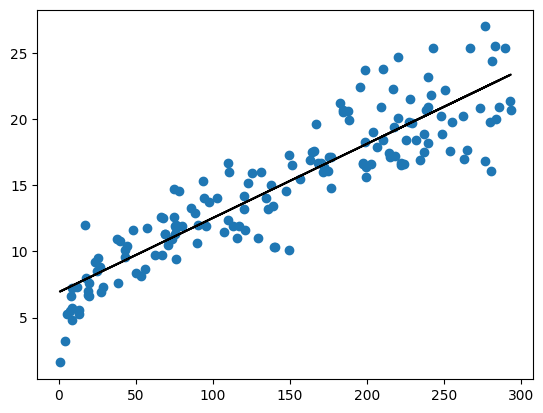

In [61]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.056*X_train+6.92, 'black');

In [62]:
y_pred = slr.predict(X_test)

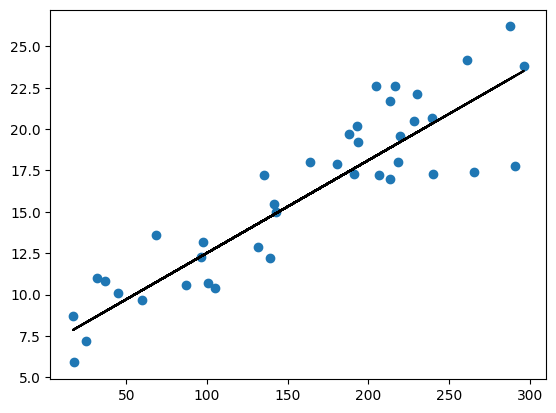

In [64]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 0.056*X_test+6.92, 'black');

In [65]:
print(y_pred)

[[16.91415922]
 [10.21622793]
 [12.70308361]
 [ 8.30411223]
 [14.6151993 ]
 [18.715748  ]
 [ 7.87305724]
 [20.1470716 ]
 [14.20072336]
 [12.294134  ]
 [22.98761342]
 [19.53917355]
 [10.70254637]
 [ 8.66332471]
 [14.39414547]
 [17.48337285]
 [ 9.39280238]
 [17.59942612]
 [22.8162967 ]
 [21.60050059]
 [21.36286771]
 [19.06943414]
 [11.74149941]
 [14.73125257]
 [18.35100917]
 [18.72127435]
 [12.47097708]
 [23.30261514]
 [17.30652978]
 [ 7.85647821]
 [19.63864778]
 [20.17470333]
 [14.8196741 ]
 [15.95810137]
 [18.88153838]
 [ 8.9617474 ]
 [18.9920653 ]
 [18.25153494]
 [12.23887055]
 [17.62705785]]


In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [67]:
mean_squared_error(y_test, y_pred)

4.9387652223974845

In [68]:
mean_absolute_error(y_test, y_pred)

1.85097971069414

In [69]:
np.sqrt(mean_absolute_error(y_test, y_pred))

1.3605071520187388

In [70]:
r2_score(y_test,y_pred)

0.8041649065229595